---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 1 </font></div>
## <div align="center"> <font color='red'> Student Name:  Devmi Shalini Perera Attapattuge                            </font></div>
## <div align="center"> <font color='red'> Student number:  s4073541                         </font></div>
## <div align="center"> <font color='red'> Student Name:  Vishini Harithya Bodi Hennedi                          </font></div>
## <div align="center"> <font color='red'> Student number:  s4072225                     </font></div>
---

# Problem statement

your problme statement goes here



## Data Splitting, and EDA

 explain why you split your Data
 wxplain your EDA and what each step represents



In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
warnings.filterwarnings('ignore')


In [7]:
with zipfile.ZipFile('./Image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [81]:
#loading and combining datasets
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

#combined only to be used in cancer detection
combined_data = pd.concat([main_data,extra_data],axis = 0)

In [83]:
base_dir = 'patch_images/'
combined_data['ImagePath'] = combined_data['ImageName'].apply(lambda x : base_dir + x)
combined_data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,ImagePath
0,22405,1,22405.png,fibroblast,0.0,0,patch_images/22405.png
1,22406,1,22406.png,fibroblast,0.0,0,patch_images/22406.png
2,22407,1,22407.png,fibroblast,0.0,0,patch_images/22407.png
3,22408,1,22408.png,fibroblast,0.0,0,patch_images/22408.png
4,22409,1,22409.png,fibroblast,0.0,0,patch_images/22409.png


## Exploratory Data Analysis (EDA)

In [23]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [25]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20280 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InstanceID    20280 non-null  int64  
 1   patientID     20280 non-null  int64  
 2   ImageName     20280 non-null  object 
 3   cellTypeName  9896 non-null   object 
 4   cellType      9896 non-null   float64
 5   isCancerous   20280 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [71]:
print('No of patients in the entire dataset: {}'.format(len(combined_data['patientID'].unique())))

No of patients in the entire dataset: 98


# Write about the total dataset no of records in each dataset (main, extra and combined) and write about the No of patients in the whole dataset

### Data Distribution - Cell Type

In [73]:
## This functions plots the class distribution graphs.

def plot_class_distribution(df, column, title, color="skyblue"):
 
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate class distribution
    class_dist = df[column].value_counts(normalize=True) * 100
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    class_dist.plot(kind='bar', color=color, ax=ax)

    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

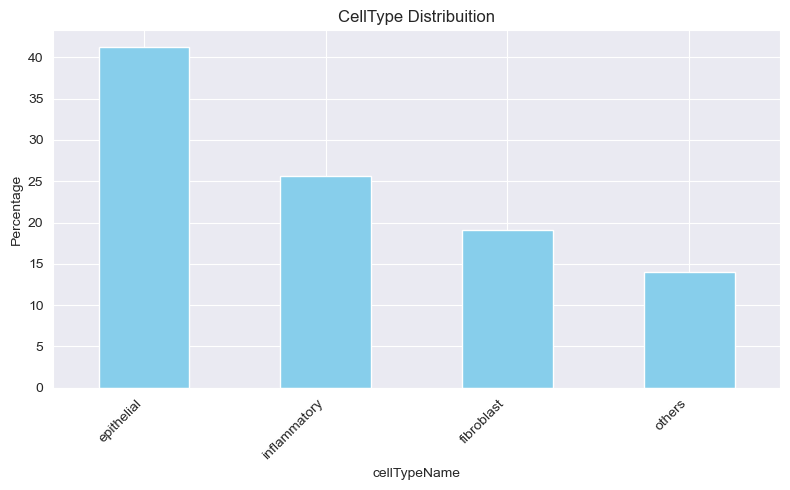

In [77]:
# cell type distribution
plot_class_distribution(combined_data, 'cellTypeName', "CellType Distribuition", color="skyblue")

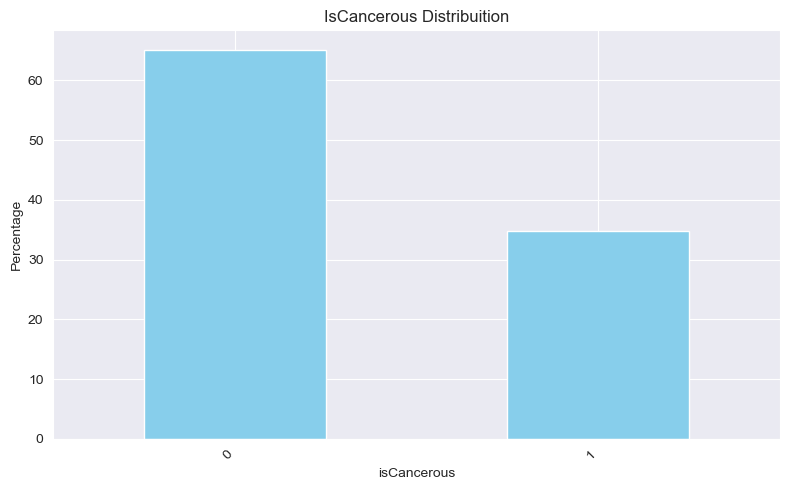

In [79]:
# IsCancer distribution
plot_class_distribution(combined_data, 'isCancerous', "IsCancerous Distribuition", color="skyblue")

## Class Imbalance Identification
### Write about the distribution and also mention multi-class classifier as there are multiple (4) classes for classification
### Write about the the distribuition and also mention binary classification as there are only 2 classes for classification. 

In [85]:
fibroblast, inflammatory, epithelial, others = [combined_data[combined_data['cellType'] == i].sample(4) for i in range(4)]


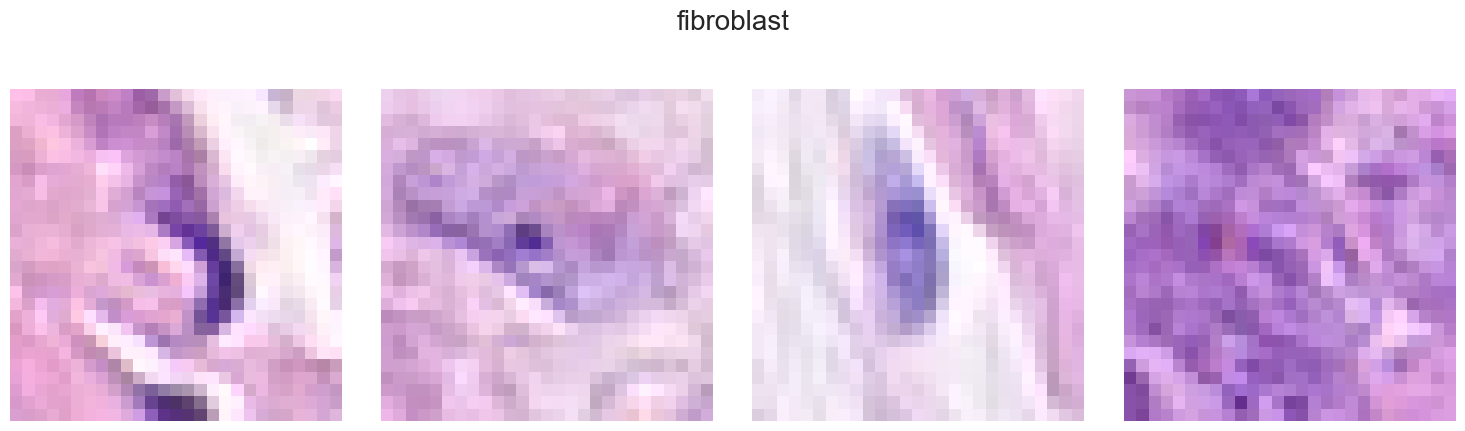

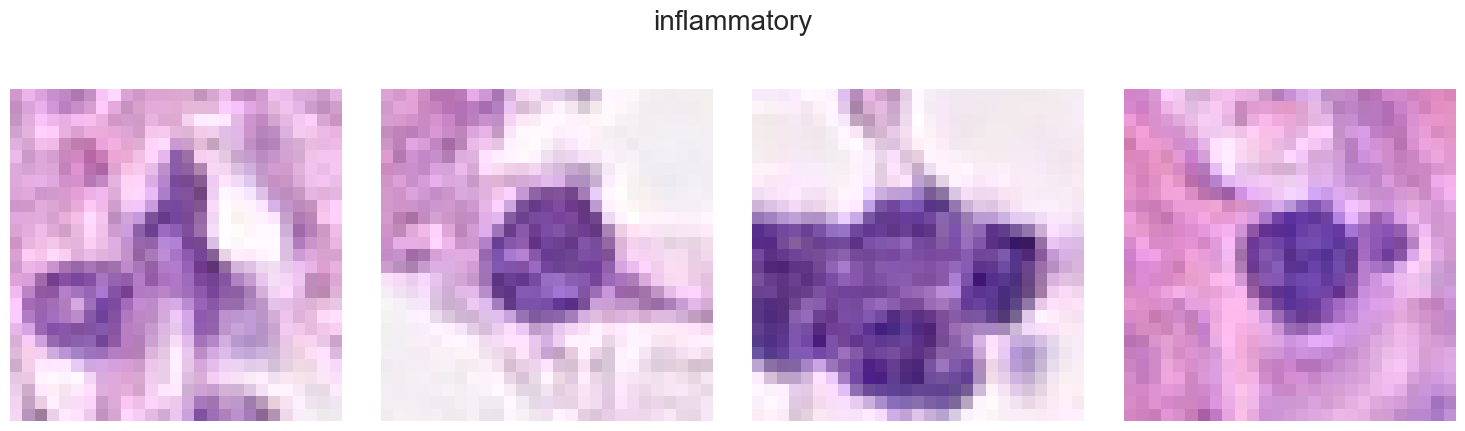

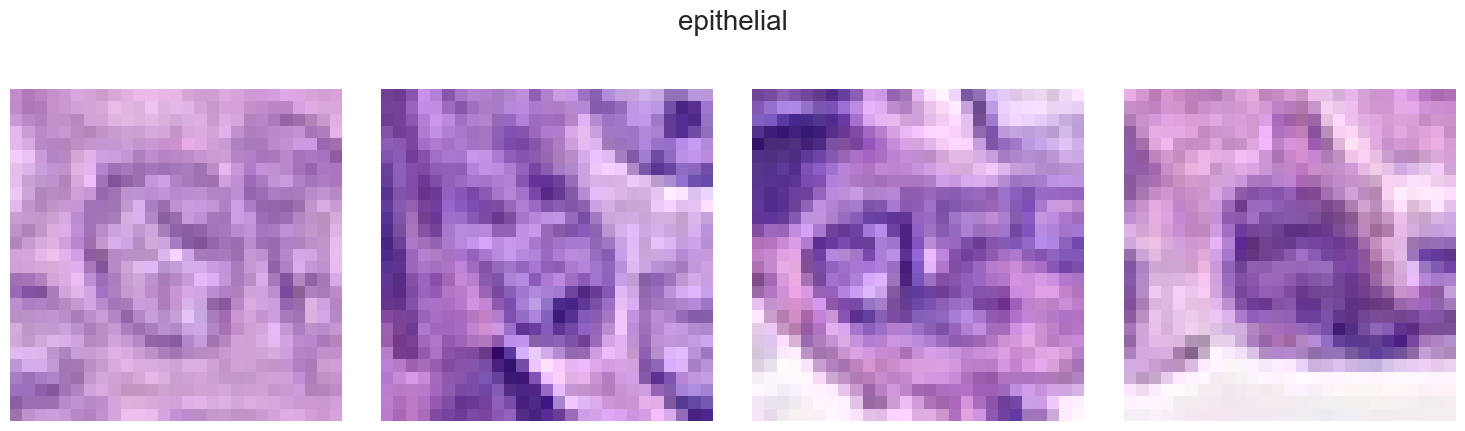

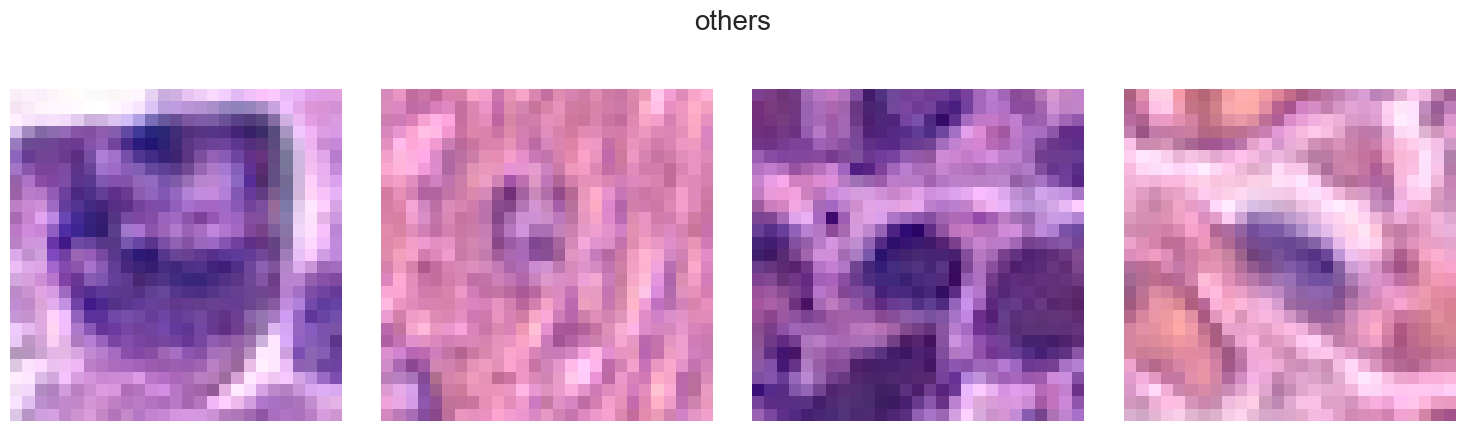

In [93]:
def plot_images(df,title):
  fig = plt.figure(figsize = (15,8))
  for i, img in enumerate(df):
    fig.add_subplot(2,4,i+1)
    plt.imshow(Image.open(img))
    plt.axis('off')
    fig.suptitle(title, fontsize = 20) 
  plt.tight_layout(rect = [0, 0.03, 1, 0.95])
  return plt.show()
img_labels = [fibroblast,inflammatory,epithelial,others]
for labels in img_labels:
  label = str(labels['cellTypeName'].iloc[0])
  plot_images(labels['ImagePath'],label)



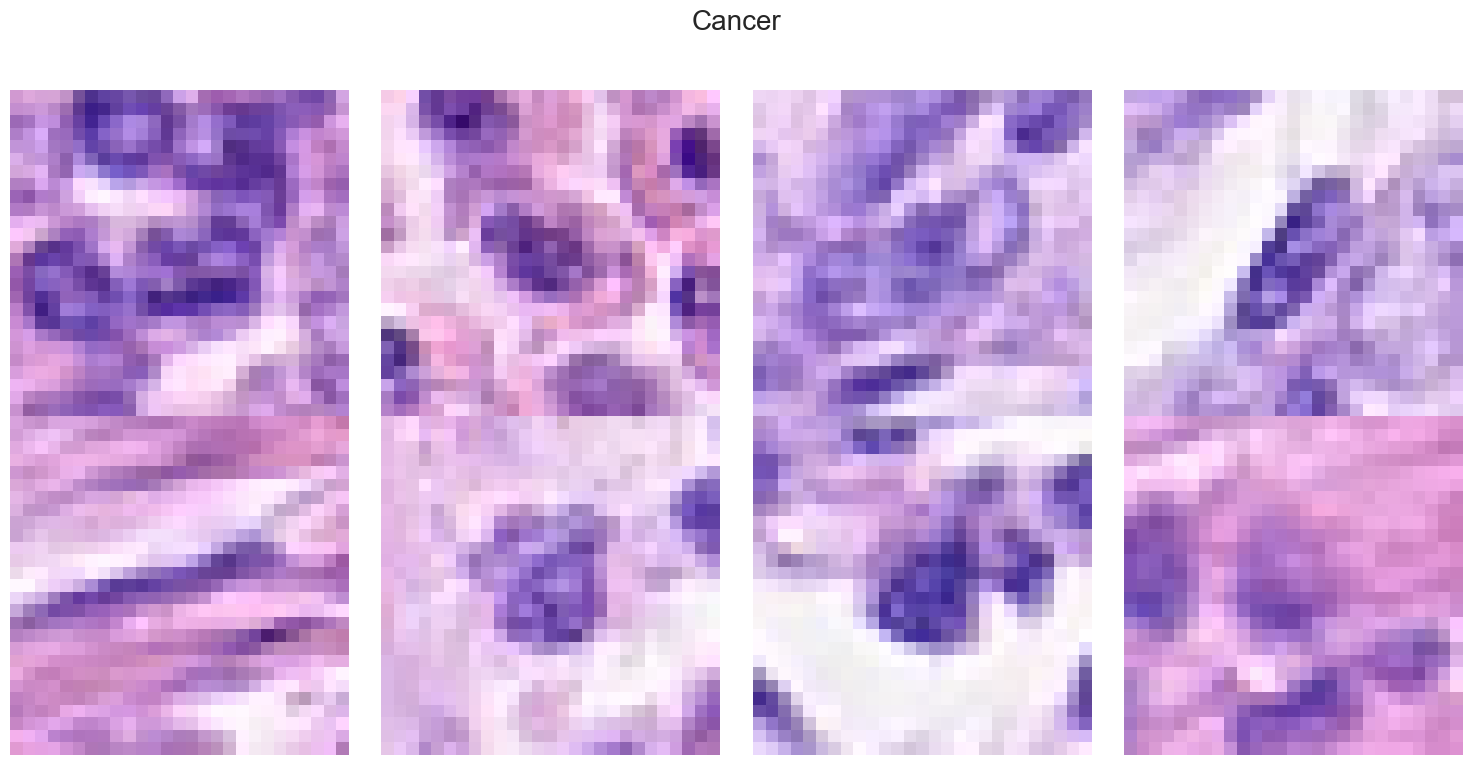

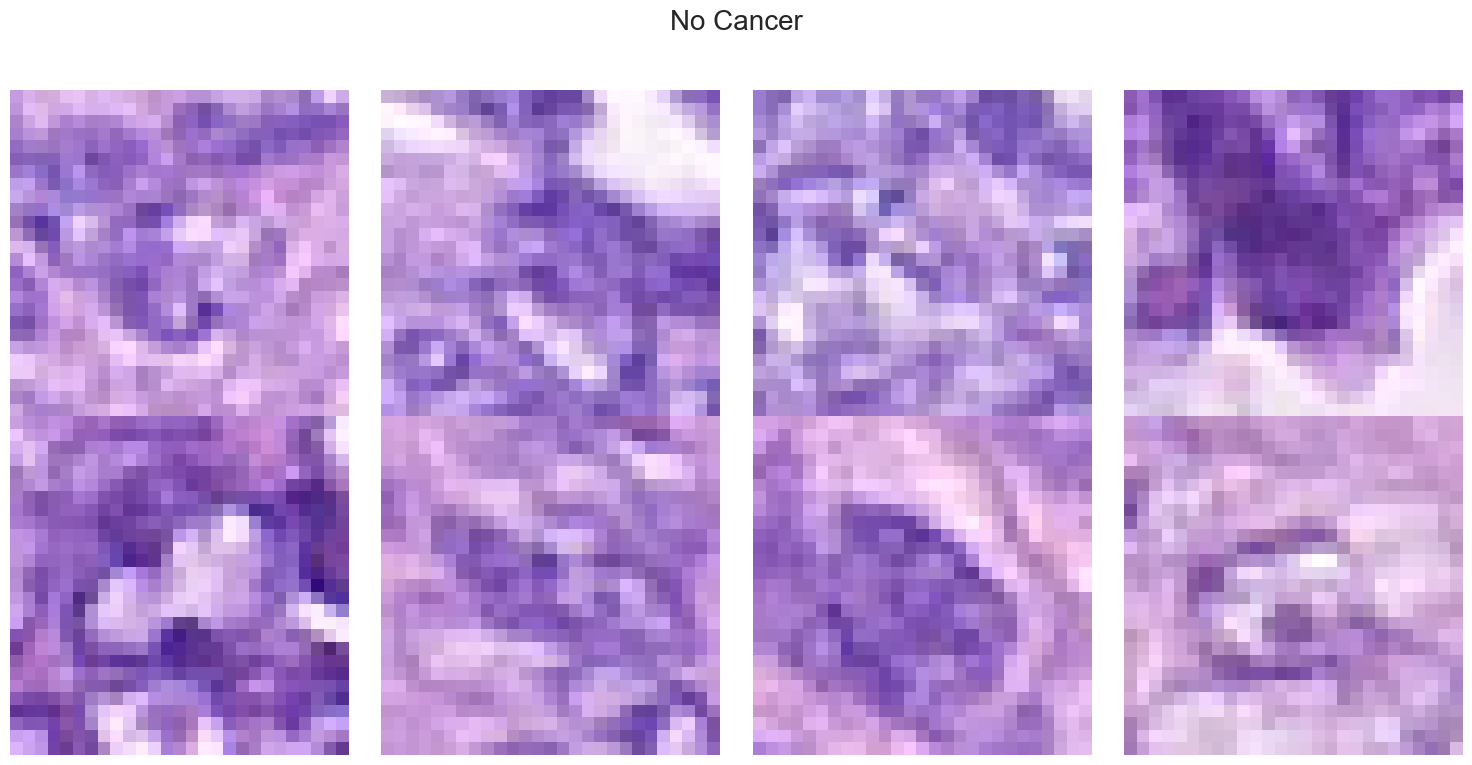

In [97]:
cancer = combined_data.loc[combined_data['isCancerous']==1].sample(8)
not_cancer = combined_data.loc[combined_data['isCancerous']==0].sample(8)

isCancerous = [not_cancer,cancer]
can_label  = ['Cancer','No Cancer']
for i, labels in enumerate(isCancerous):
  plot_images(labels['ImagePath'],can_label[i])

# Exploratory Data Analysis (2 marks): Provides visual samples from the dataset and identifies

potential issues (e.g., occlusion, blur, embedded text)

Image Analysis - blur therefore by using image geenrator the images will be scaled down 

## Data Splitting

In [55]:
def split_data(data):

    #  Split based on unique patient IDs for train and test
    unique_patients = data['patientID'].unique()
    
    # First split: 80% train_val, 20% test
    train_val_patients, test_patients = train_test_split(
        unique_patients, test_size=0.2, random_state=42
    )
    
    # Filter the full dataset based on patient IDs
    train_val_data = data[data['patientID'].isin(train_val_patients)]
    test_data = data[data['patientID'].isin(test_patients)]
    
    # From train_val, split 80% train, 20% validation
    train_patients, val_patients = train_test_split(
        train_val_patients, test_size=0.2, random_state=42
    )
    
    train_data = data[data['patientID'].isin(train_patients)]
    val_data = combined_data[combined_data['patientID'].isin(val_patients)]
     
    
    print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))
    return test_data, train_data,val_data

In [57]:
#split_data_for_cancer_classifier
test_data_cancer,train_data_cancer,val_data_cancer=split_data(combined_data)
#total number of records in each dataset equals the  main_data+extra_data.


Train data : 12319, Val Data: 4005, Test Data: 3956


In [59]:
#split_data_for_cell_type_classifier_full_supervised
test_data_cell,train_data_cell,val_data_cell=split_data(main_data)


Train data : 6215, Val Data: 1842, Test Data: 1839


In [63]:
def check_data_leakages(train_data,val_data,test_data):
    # Check for data leakages
    # Patient Ids should be uniqye in the 3 seperate datasets. Patient Ids cannot be overlapped between the datasets
    # Get sets of patient IDs in each split
    train_patients_set = set(train_data['patientID'])
    val_patients_set = set(val_data['patientID'])
    test_patients_set = set(test_data['patientID'])
    
    # Check for overlaps
    leak_train_val = train_patients_set.intersection(val_patients_set)
    leak_train_test = train_patients_set.intersection(test_patients_set)
    leak_val_test = val_patients_set.intersection(test_patients_set)
    
    # Print results
    print("Patients in both train and val:", leak_train_val)
    print("Patients in both train and test:", leak_train_test)
    print("Patients in both val and test:", leak_val_test)
    
    # no data leakages. 
        

In [65]:
#checking_data_leakages_for_cancer_data_split
check_data_leakages(train_data_cancer,val_data_cancer,test_data_cancer)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


In [67]:
#checking_data_leakages_for_cell_data_split
check_data_leakages(train_data_cell,val_data_cell,test_data_cell)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


# Write about Data Leakage - There were no data leakages no overlapping patient ids in train/val/test datasets. Total number of records in splits = Total number of records avaialable (test+train+val= 20280)

### EDA result Analysis and deriven conclusion
Explain what you have observed from the output of your EDA


## Data Pre- Processing

Explain the step taken and why, or if you decide not to perform ore-processing then why not?

In [101]:
#Changing target variables data type to str for ImageDataGenerator
train_data_cancer['isCancerous'] = train_data_cancer['isCancerous'].astype('str')
val_data_cancer['isCancerous'] = val_data_cancer['isCancerous'].astype('str')
test_data_cancer['isCancerous'] = test_data_cancer['isCancerous'].astype('str')

train_data_cell['cellType'] = train_data_cell['cellType'].astype('str')
val_data_cell['cellType'] = val_data_cell['cellType'].astype('str')
test_data_cell['cellType'] = test_data_cell['cellType'].astype('str')

In [411]:
def image_data_generator(train_data, val_data, test_data, x_column, y_column, target_size=(28, 28), batch_size=32):
    datagen_args = dict(rescale=1./255, data_format='channels_last')
    
    train_datagen = ImageDataGenerator(**datagen_args)
    val_datagen = ImageDataGenerator(**datagen_args)
    test_datagen = ImageDataGenerator(**datagen_args)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, validation_generator, test_generator

In [390]:
#Images of Cancer/No cancer after processing
train_gen_can,val_gen_can,test_gen_can=image_data_generator(train_data_cancer,val_data_cancer,test_data_cancer,"ImageName","isCancerous")

Found 12319 validated image filenames belonging to 2 classes.
Found 4005 validated image filenames belonging to 2 classes.
Found 3956 validated image filenames belonging to 2 classes.


In [459]:
#Images of celltypes after processing
train_gen_cell,val_gen_cell,test_gen_cell=image_data_generator(train_data_cell,val_data_cell,test_data_cell,"ImageName","cellType")

Found 6215 validated image filenames belonging to 4 classes.
Found 1842 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


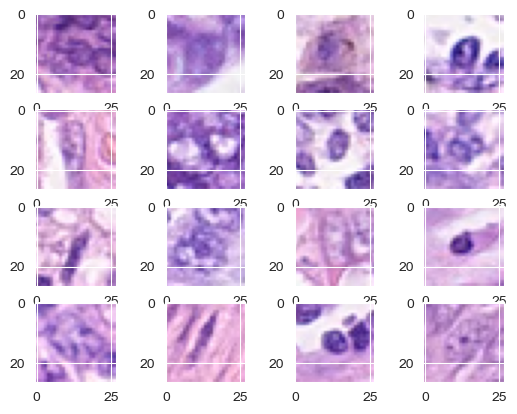

In [161]:
images, labels = next(train_gen_can)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

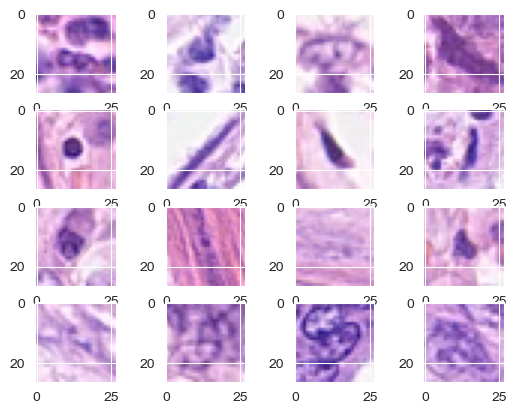

In [159]:
images, labels = next(train_gen_cell)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

# Write about using Image generator processing images

### Performance Metrics Selection

## Explain that the below functions are the metrics we used and why? F1 -score works well with imbalance data similarly find for others as well give a brief explanation.

In [ ]:
train_gen_can,val_gen_can,test_gen_can

## Base Model 

### Base Model - VGG - IsCancerous Classifier

In [418]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES = 2
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='sigmoid')
])

In [420]:
model_VGG_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,330 (2.35 MB)

 Trainable params: 615,330 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [422]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [424]:
base_model = model_VGG_1.fit(train_gen_can, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.7588 - loss: 0.4844 - val_accuracy: 0.8290 - val_loss: 0.3888
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.8644 - loss: 0.3202 - val_accuracy: 0.8742 - val_loss: 0.2970
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.8742 - loss: 0.2991 - val_accuracy: 0.8782 - val_loss: 0.2881
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.8869 - loss: 0.2793 - val_accuracy: 0.8864 - val_loss: 0.2822
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.8995 - loss: 0.2574 - val_accuracy: 0.8914 - val_loss: 0.2746
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.9027 - loss: 0.2506 - val_accuracy: 0.8859 - val_loss: 0.2785
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.9002 - loss: 0.2487 - val_accuracy: 0.8689 - val_loss: 0.3105
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 38s 99ms/step - accuracy: 0.9096 - loss: 0.2256 - 

In [430]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, metrics=('accuracy',), title='Learning Curve'):
    plt.figure(figsize=(14, 5))

    #Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # --- Plot metrics ---
    plt.subplot(1, 2, 2)
    for metric in metrics:
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}', marker='o')
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}', marker='o')
    plt.title(f'{title} - Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


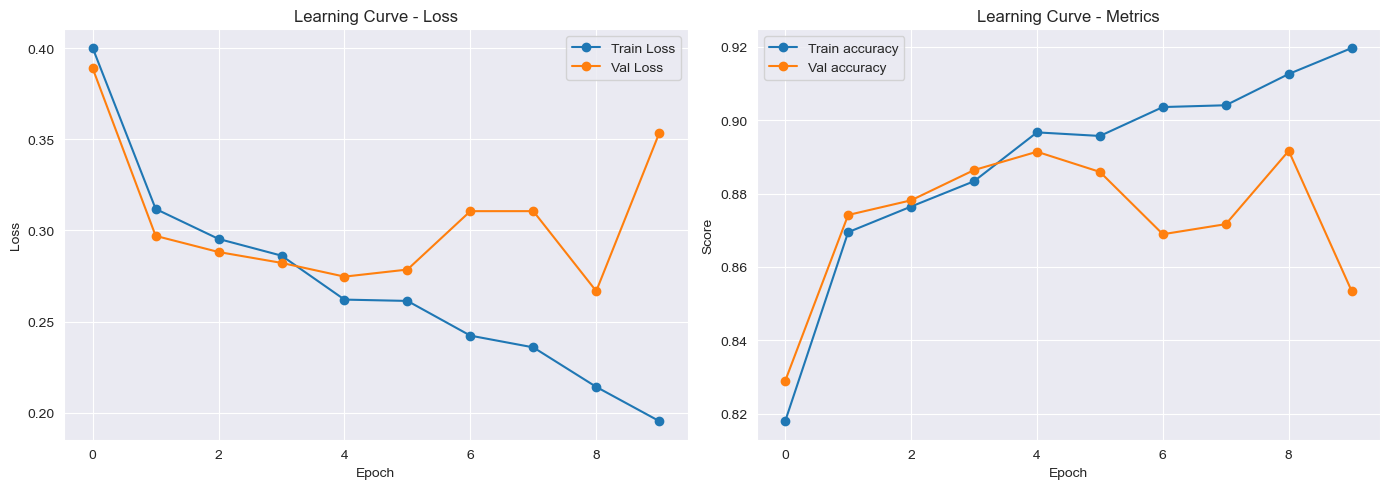

In [432]:
plot_learning_curve(base_model, metrics=('accuracy',), title='Learning Curve')

In [434]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
def model_evaluation(test_generator,model):
  # Predict the probabilities
  y_pred_probs = model.predict(test_generator, verbose=0)
  y_pred = np.argmax(y_pred_probs, axis=1)
  y_true = test_generator.classes

  # Class names
  class_names = list(test_generator.class_indices.keys())

  print("Classification Report for the model:")
  print(classification_report(y_true, y_pred, target_names=class_names))

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2909
           1       0.71      0.85      0.78      1047

    accuracy                           0.87      3956
   macro avg       0.83      0.87      0.84      3956
weighted avg       0.88      0.87      0.87      3956



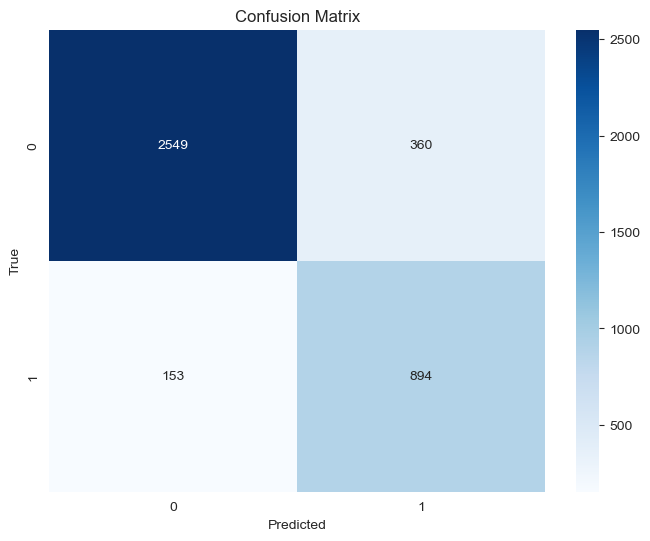

In [436]:
model_evaluation(test_gen_can, model_VGG_1)

In [ ]:
train_gen_cell,val_gen_cell,test_gen_cell

### Base Model - CellType

In [461]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES = 4 # num of classes 
model_VGG_1_Cell = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='softmax')
])

In [463]:
model_VGG_1_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [465]:
base_model_cell = model_VGG_1_Cell.fit(train_gen_cell, validation_data = val_gen_cell, epochs=10, verbose=1)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.3690 - loss: 1.2945 - val_accuracy: 0.5527 - val_loss: 1.0837
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.7076 - loss: 0.7752 - val_accuracy: 0.6037 - val_loss: 1.0159
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.7418 - loss: 0.6743 - val_accuracy: 0.6064 - val_loss: 1.0852
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.7760 - loss: 0.6011 - val_accuracy: 0.6314 - val_loss: 1.0028
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.7889 - loss: 0.5718 - val_accuracy: 0.6422 - val_loss: 1.0302
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8111 - loss: 0.5025 - val_accuracy: 0.5999 - val_loss: 1.2743
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8102 - loss: 0.5091 - val_accuracy: 0.5809 - val_loss: 1.0582
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.8144 - loss: 0.4851

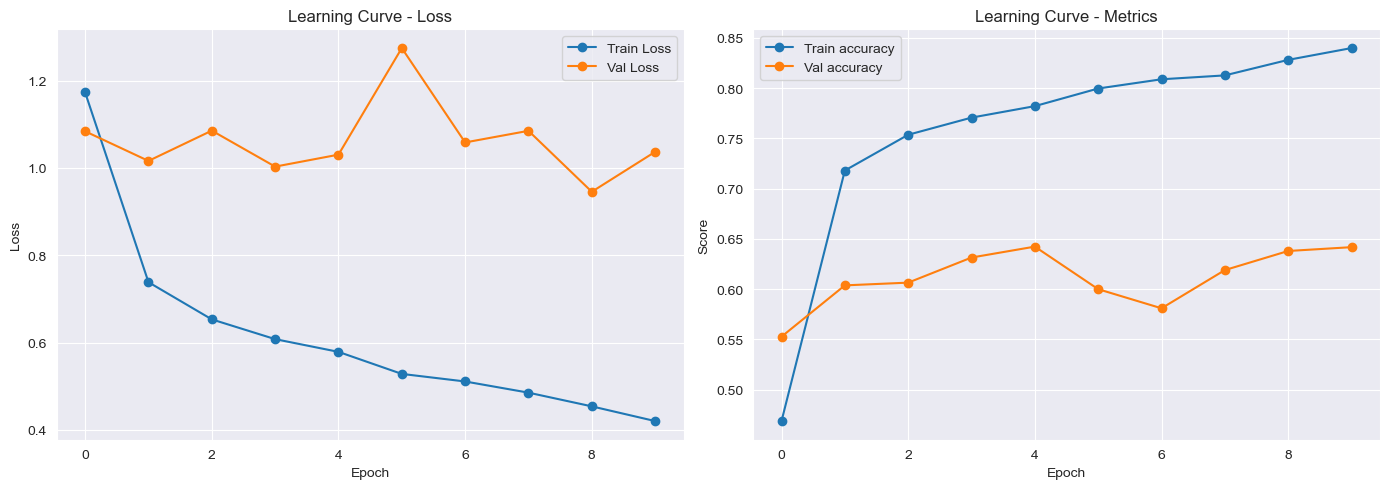

In [471]:
plot_learning_curve(base_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       261
           1       0.52      0.81      0.63       432
           2       0.88      0.79      0.83       925
           3       0.30      0.09      0.14       221

    accuracy                           0.67      1839
   macro avg       0.55      0.55      0.52      1839
weighted avg       0.67      0.67      0.65      1839



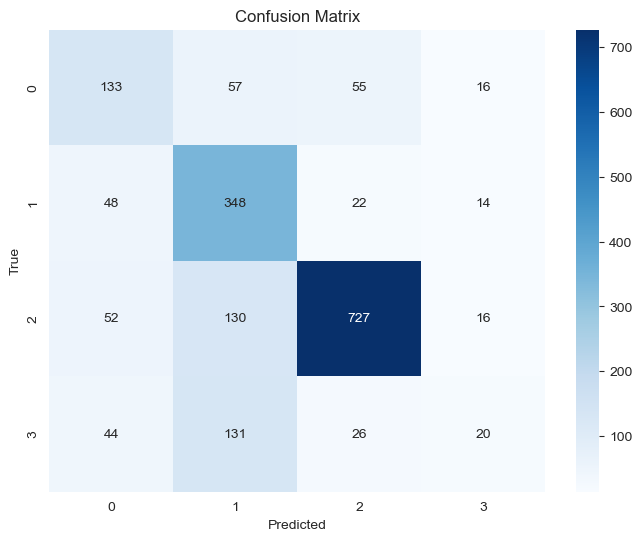

In [473]:
model_evaluation(test_gen_cell, model_VGG_1_Cell)

### Fine Tuning Models - Cancer Detection

In [482]:
#Data Augmentation and Adding Regularization 



train_datagen_aug = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                       rotation_range=45, width_shift_range=0.2,height_shift_range=0.2, shear_range = 0.2,horizontal_flip=True,vertical_flip=True)

batch_size = 32

train_generator_aug = train_datagen_aug.flow_from_dataframe(
        dataframe=train_data_cancer,
        directory='patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 12319 validated image filenames belonging to 2 classes.


In [492]:
OUTPUT_CLASSES_can=2
model_VGG_2_can = tf.keras.Sequential([
    
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES_can,activation='sigmoid')
])

In [494]:
model_VGG_2_can.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [498]:
VGG2_model_can = model_VGG_2_can.fit(train_generator_aug, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.8187 - loss: 0.4149 - val_accuracy: 0.8310 - val_loss: 0.3642
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8480 - loss: 0.3621 - val_accuracy: 0.8072 - val_loss: 0.4266
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.8566 - loss: 0.3407 - val_accuracy: 0.8000 - val_loss: 0.4450
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8674 - loss: 0.3269 - val_accuracy: 0.8407 - val_loss: 0.3710
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8711 - loss: 0.3088 - val_accuracy: 0.8537 - val_loss: 0.3460
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.8678 - loss: 0.3143 - val_accuracy: 0.8412 - val_loss: 0.3559
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8691 - loss: 0.3116 - val_accuracy: 0.8677 - val_loss: 0.3133
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8753 - loss: 0

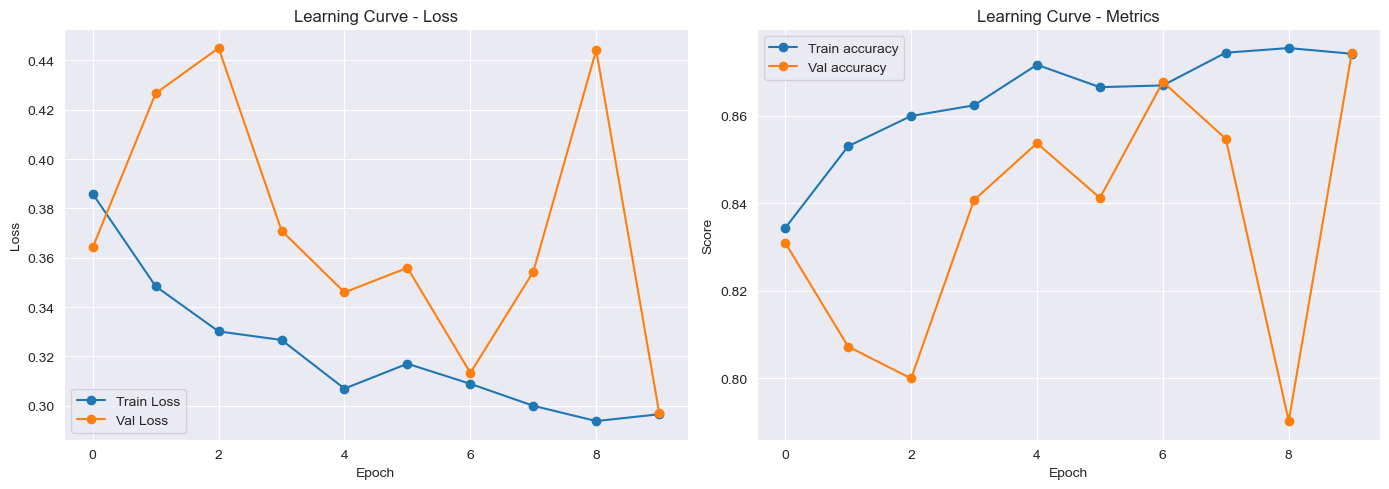

In [500]:
plot_learning_curve(VGG2_model_can, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2909
           1       0.68      0.88      0.77      1047

    accuracy                           0.86      3956
   macro avg       0.82      0.87      0.83      3956
weighted avg       0.88      0.86      0.87      3956



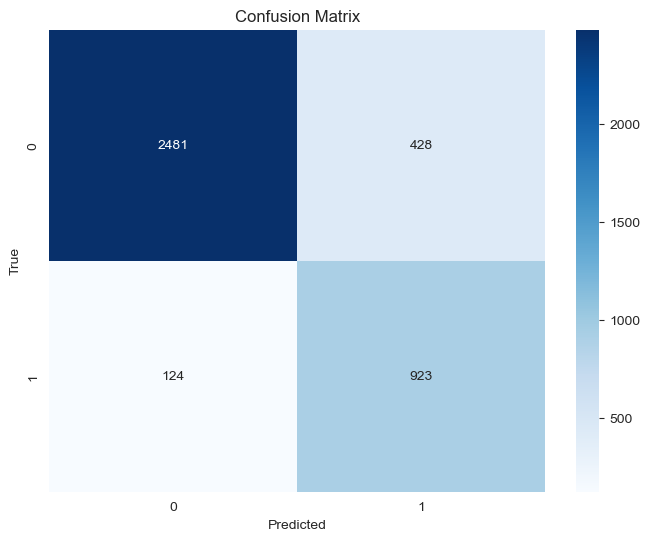

In [504]:
model_evaluation(test_gen_can, model_VGG_2)

### Applying Regularizations + Dropouts 

In [544]:
reg_lambda = 0.0001  # Reduced regularization
OUTPUT_CLASSES_can = 2  # For binary classification

model_VGG_3_can = tf.keras.Sequential([
    # VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=INPUT_DIM),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),  # Increased
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES_can, activation='sigmoid')
])

In [546]:
model_VGG_3_can.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [548]:
VGG3_model_can = model_VGG_3_can.fit(train_generator_aug, validation_data = val_gen_can, epochs=10, verbose=1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 59s 137ms/step - accuracy: 0.6952 - loss: 0.6926 - val_accuracy: 0.7401 - val_loss: 0.5753
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 136ms/step - accuracy: 0.8176 - loss: 0.4432 - val_accuracy: 0.8137 - val_loss: 0.4127
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.8427 - loss: 0.3990 - val_accuracy: 0.8357 - val_loss: 0.3853
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 132ms/step - accuracy: 0.8384 - loss: 0.3957 - val_accuracy: 0.8270 - val_loss: 0.3880
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8420 - loss: 0.3839 - val_accuracy: 0.8372 - val_loss: 0.3771
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8462 - loss: 0.3790 - val_accuracy: 0.8210 - val_loss: 0.4160
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8526 - loss: 0.3718 - val_accuracy: 0.8537 - val_loss: 0.3543
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.8531 - loss: 0

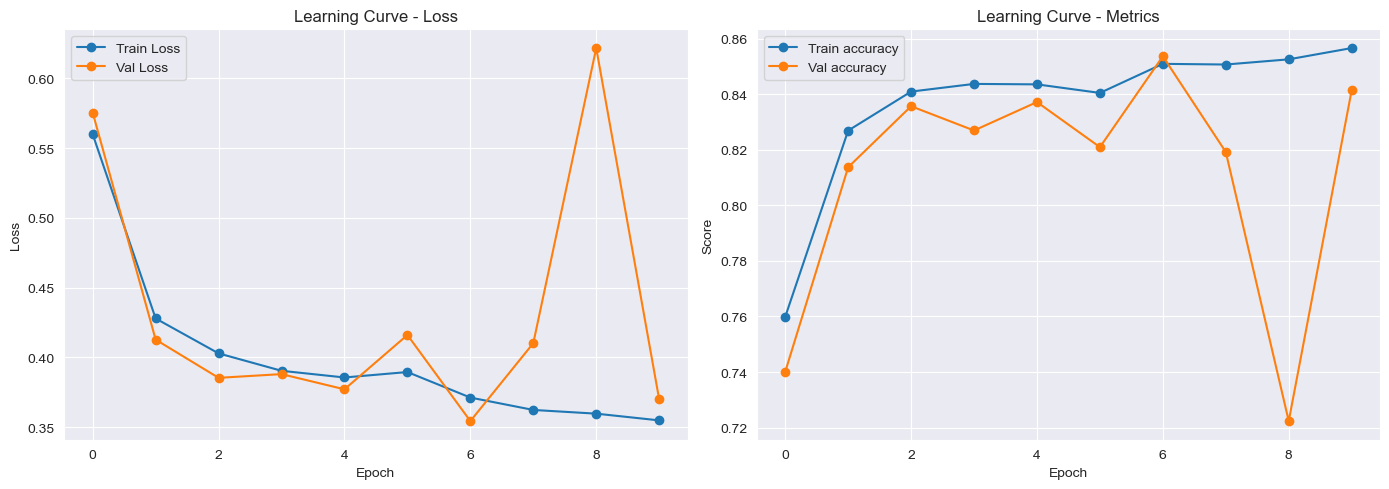

In [550]:
plot_learning_curve(VGG3_model_can, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      2909
           1       0.54      0.94      0.68      1047

    accuracy                           0.77      3956
   macro avg       0.75      0.82      0.75      3956
weighted avg       0.85      0.77      0.79      3956



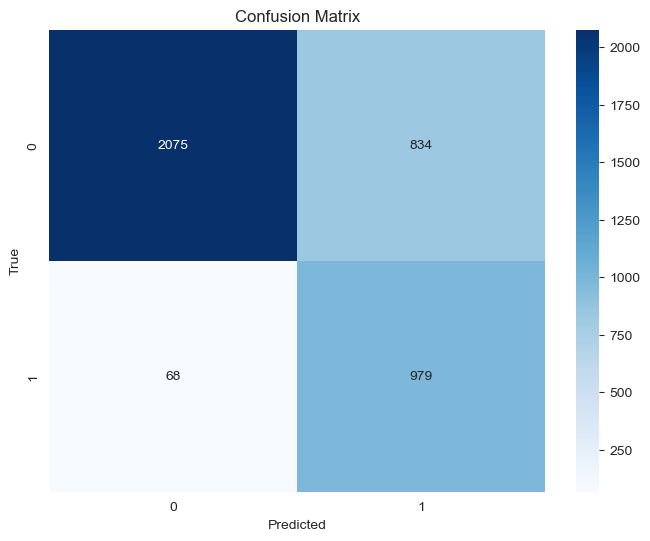

In [553]:
model_evaluation(test_gen_can, model_VGG_3_can)

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 


### Fine Tuning Models - Cell Type

In [568]:
batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005
#Applying Data Augmentation Techniques + Regularization 

train_datagen_aug_cell = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,             # Reduced from 45: too much rotation might distort cells unnaturally
    width_shift_range=0.15,        # Slightly more conservative shifting
    height_shift_range=0.15,
    shear_range=0.1,               # Reduced: aggressive shear can distort biological structures
    zoom_range=0.2,                # Add zoom for local pattern variation
    horizontal_flip=True,
    vertical_flip=True,            # Keep vertical flip; relevant for microscopic symmetry
    brightness_range=[0.8, 1.2],   # NEW: simulates microscope lighting variation
    fill_mode='nearest',
    data_format='channels_last'
)


batch_size = 32

train_generator_aug_cell = train_datagen_aug_cell.flow_from_dataframe(
        dataframe=train_data_cell,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

model_VGG_2_Cell = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=INPUT_DIM, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

Found 6215 validated image filenames belonging to 4 classes.


In [570]:
model_VGG_2_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [572]:
VGG2_model_cell = model_VGG_2_Cell.fit(train_generator_aug_cell, validation_data = val_gen_cell, epochs=10, verbose=1)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.3642 - loss: 1.5824 - val_accuracy: 0.5353 - val_loss: 1.4523
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.5274 - loss: 1.1167 - val_accuracy: 0.5413 - val_loss: 1.1349
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.6812 - loss: 0.8925 - val_accuracy: 0.5071 - val_loss: 1.1970
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.7183 - loss: 0.8075 - val_accuracy: 0.5879 - val_loss: 1.1136
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.7247 - loss: 0.7742 - val_accuracy: 0.5657 - val_loss: 1.0976
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7273 - loss: 0.7651 - val_accuracy: 0.5717 - val_loss: 1.1949
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.7194 - loss: 0.7684 - val_accuracy: 0.6471 - val_loss: 1.0425
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7560 - loss: 0

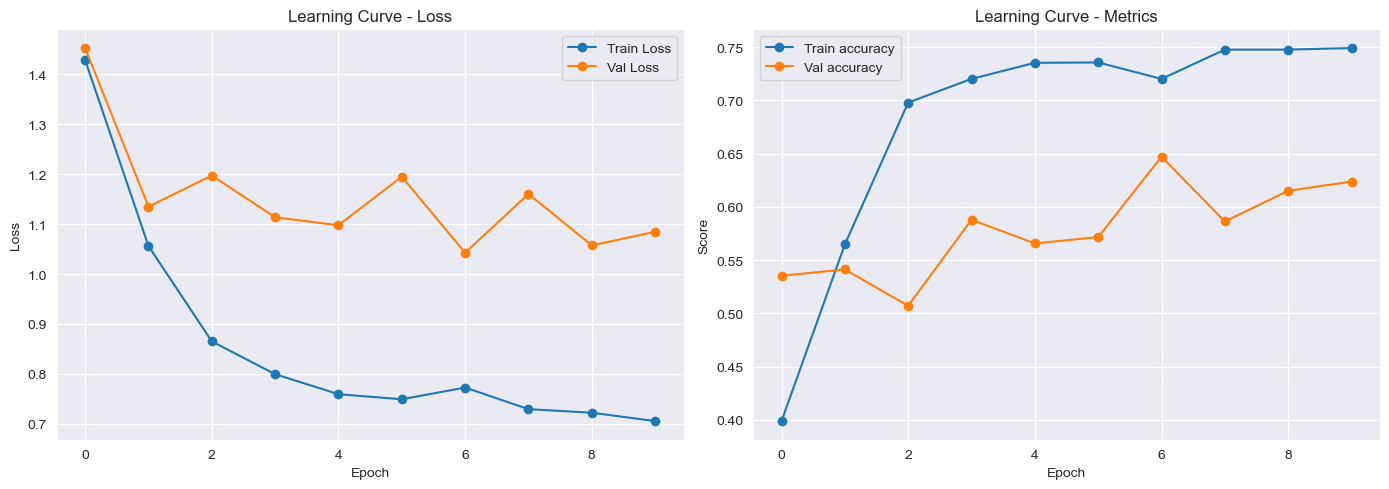

In [574]:
plot_learning_curve(VGG2_model_cell, metrics=('accuracy',), title='Learning Curve')

Classification Report for the model:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       261
           1       0.46      0.81      0.59       432
           2       0.89      0.79      0.84       925
           3       0.00      0.00      0.00       221

    accuracy                           0.65      1839
   macro avg       0.46      0.51      0.47      1839
weighted avg       0.62      0.65      0.63      1839



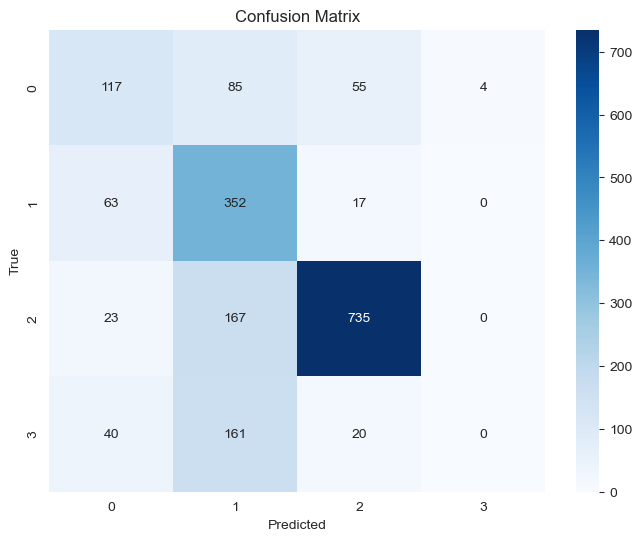

In [576]:
model_evaluation(test_gen_cell, model_VGG_2_Cell)

In [618]:
# Model  2- Class Weight Training + Dropout

batch_size = 32
INPUT_DIM = (28,28,3)
OUTPUT_CLASSES_cell = 4 # num of classes 
reg_lambda = 0.0005
#Applying Data Augmentation Techniques + Regularization 

train_datagen_aug_cell = ImageDataGenerator(
    rescale=1./255,
                # Reduced from 45: too much rotation might distort cells unnaturally
    width_shift_range=0.15,        # Slightly more conservative shifting
    height_shift_range=0.15,
    shear_range=0.1,               # Reduced: aggressive shear can distort biological structures
    zoom_range=0.2,                # Add zoom for local pattern variation
    horizontal_flip=True,
    vertical_flip=True,            # Keep vertical flip; relevant for microscopic symmetry
    brightness_range=[0.8, 1.2],   # NEW: simulates microscope lighting variation
    fill_mode='nearest',
    data_format='channels_last'
)


batch_size = 32

train_generator_aug_cell = train_datagen_aug_cell.flow_from_dataframe(
        dataframe=train_data_cell,
        directory='patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

model_VGG_3_Cell = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=INPUT_DIM, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES_cell, activation='softmax')
])

from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_data_cell['cellType']),
                                     y=train_data_cell['cellType'])

#class_weight_dict = dict(zip(np.unique(train_data['cellType']), class_weights))

class_weights = dict(enumerate(class_weights))

Found 6215 validated image filenames belonging to 4 classes.


In [624]:
model_VGG_3_Cell.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
VGG3_model_cell = model_VGG_3_Cell.fit(train_gen_cell, validation_data = val_gen_cell, epochs=10, verbose=1)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.3234 - loss: 1.3513 - val_accuracy: 0.4772 - val_loss: 1.3556
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.3680 - loss: 1.3045 - val_accuracy: 0.4772 - val_loss: 1.3156
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.4009 - loss: 1.2123 - val_accuracy: 0.5081 - val_loss: 1.2177
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.5229 - loss: 1.1062 - val_accuracy: 0.5011 - val_loss: 1.2085
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.5514 - loss: 1.0273 - val_accuracy: 0.5429 - val_loss: 1.2674
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.5439 - loss: 1.0505 - val_accuracy: 0.4566 - val_loss: 1.1904
Epoch 7/10
 81/195 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.5758 - loss: 1.0173

## Polynomila regression and Generalized Linear Models (if applicable)

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

In [ ]:
## TODO
## You need to run this code, so the output is displayed bellow

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 

## Single Linear or Polynomial regression with two outputs

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning

Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 

### You can add any other analysis you want with justification here (adding code and markdown)